In [ ]:
!wget https://bailando.berkeley.edu/enron/enron_with_categories.tar.gz

--2022-08-04 05:36:27--  https://bailando.berkeley.edu/enron/enron_with_categories.tar.gz
Resolving bailando.berkeley.edu (bailando.berkeley.edu)... 128.32.78.19
Connecting to bailando.berkeley.edu (bailando.berkeley.edu)|128.32.78.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4523350 (4.3M) [application/x-gzip]
Saving to: ‘enron_with_categories.tar.gz’

enron_with_categori 100%[===================>]   4.31M  3.61MB/s    in 1.2s    

2022-08-04 05:36:29 (3.61 MB/s) - ‘enron_with_categories.tar.gz’ saved [4523350/4523350]



In [ ]:
!tar -xvf /content/enron_with_categories.tar.gz

enron_with_categories/
enron_with_categories/1/
enron_with_categories/1/114715.txt
enron_with_categories/1/114715.cats
enron_with_categories/1/229405.txt
enron_with_categories/1/229405.cats
enron_with_categories/1/232795.txt
enron_with_categories/1/232795.cats
enron_with_categories/1/62815.txt
enron_with_categories/1/62815.cats
enron_with_categories/1/118871.txt
enron_with_categories/1/118871.cats
enron_with_categories/1/106588.txt
enron_with_categories/1/106588.cats
enron_with_categories/1/122973.txt
enron_with_categories/1/122973.cats
enron_with_categories/1/106590.txt
enron_with_categories/1/106590.cats
enron_with_categories/1/139359.txt
enron_with_categories/1/139359.cats
enron_with_categories/1/136551.txt
enron_with_categories/1/136551.cats
enron_with_categories/1/98429.txt
enron_with_categories/1/98429.cats
enron_with_categories/1/221314.txt
enron_with_categories/1/221314.cats
enron_with_categories/1/54635.txt
enron_with_categories/1/54635.cats
enron_with_categories/1/136556.txt


In [ ]:
f = open("/content/enron_with_categories/categories.txt", "r")
print(f.read())

Format of each line in .cats file:
n1,n2,n3

n1 = top-level category
n2 = second-level category
n3 = frequency with which this category was assigned to this message


Here are the categories:


1 Coarse genre
 
1.1 Company Business, Strategy, etc. (elaborate in Section 3 [Topics])
1.2 Purely Personal
1.3 Personal but in professional context (e.g., it was good working with you)
1.4 Logistic Arrangements (meeting scheduling, technical support, etc)
1.5 Employment arrangements (job seeking, hiring, recommendations, etc)
1.6 Document editing/checking (collaboration)
1.7 Empty message (due to missing attachment)
1.8 Empty message


2 Included/forwarded information 

2.1 Includes new text in addition to forwarded material
2.2 Forwarded email(s) including replies
2.3 Business letter(s) / document(s)
2.4 News article(s)
2.5 Government / academic report(s)
2.6 Government action(s) (such as results of a hearing, etc)
2.7 Press release(s)
2.8 Legal documents (complaints, lawsuits, advice)
2.9 Poi

In [ ]:
import glob
import fileinput
import shutil
import pandas as pd

In [ ]:
basedir = "/content/enron_with_categories"


In [ ]:
def parse_raw_message(raw_message):
    lines = raw_message.split('\n')
    email = {}
    message = ''
    keys_to_extract = ['from', 'to']
    for line in lines:
        if ':' not in line:
            message += line.strip()
            email['body'] = message
        else:
            pairs = line.split(':')
            key = pairs[0].lower()
            val = pairs[1].strip()
            if key in keys_to_extract:
                email[key] = val
    return email

In [ ]:
testfile = "/content/enron_with_categories/1/82353.txt"
testlabel = "/content/enron_with_categories/1/82353.cats"
with open(testfile, 'r') as readfile:
    sample = readfile.read()
with open(testlabel, 'r') as readlabel:
    samplelabel = readlabel.read()
print(sample)
print("***********************")
print(samplelabel)

Message-ID: <3524436.1075863727537.JavaMail.evans@thyme>
Date: Tue, 12 Feb 2002 05:07:17 -0800 (PST)
From: m..presto@enron.com
To: fgiffels@hgp-inc.com
Subject: RE: Confidential Contact data and RFI
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Presto, Kevin M. </O=ENRON/OU=NA/CN=RECIPIENTS/CN=KPRESTO>
X-To: 'Fred W. Giffels' <fgiffels@HGP-Inc.com>
X-cc: 
X-bcc: 
X-Folder: \Kevin_Presto_Mar2002_1\Presto, Kevin M.\Sent Items
X-Origin: Presto-K
X-FileName: kpresto (Non-Privileged).pst

Any nuclear specific info?
 

Kevin Presto 
UBS Warburg Energy 
kevin.presto@ubswenergy.com 
Phone:  713-853-5035 
Fax:  713-646-8272 

-----Original Message-----
From: Fred W. Giffels [mailto:fgiffels@HGP-Inc.com]
Sent: Tuesday, February 12, 2002 7:04 AM
To: Presto, Kevin M.
Cc: Dan Salter
Subject: Re: Confidential Contact data and RFI


Confidential
Kevin
I know you would not bid the entire 1000Mwe, we are trying to come up with a proxy to assist in 

In [ ]:
combined_df = pd.DataFrame(columns=['foldername', 'file', 'email', 'label'])

ind = 0

for i in range(7):
    folder = i + 1
    folder_add = basedir + '/' + str(folder)

    filenames = glob.glob(folder_add + '/*.txt')


    for filename  in filenames:

        ids = filename[31:-4]
        label_filename = filename[:-4] + '.cats'
        
        foldername = ids[0]
        file = ids[2:]
        
        
        with open(filename, 'r') as readfile:
            email = readfile.read()
        with open(label_filename, 'r') as readlabel:
            label = readlabel.read()
        
        combined_df.loc[ind] = [foldername, file, email, label ]
        ind += 1

In [ ]:
combined_df.head()

,foldername,file,email,label
0,1,174119,Message-ID: <18685814.1075846168607.JavaMail.e...,"1,1,2\n2,1,2\n2,2,2\n3,8,2\n"
1,1,175498,Message-ID: <8728626.1075847602036.JavaMail.ev...,"1,1,1\n2,2,1\n3,5,1\n"
2,1,125766,Message-ID: <13213843.1075843681416.JavaMail.e...,"1,1,1\n2,4,1\n3,1,1\n3,3,1\n3,4,1\n3,6,1\n"
3,1,52167,Message-ID: <15817789.1075863286500.JavaMail.e...,"1,1,2\n3,1,2\n4,12,2\n"
4,1,150202,Message-ID: <5910975.1075844940218.JavaMail.ev...,"1,1,2\n2,1,2\n2,2,2\n3,10,2\n"


In [ ]:
# Shift all files to new file directory
import shutil
import os

source = '/content/enron_with_categories/'
destination = '/content/combined/'

for folder in range(1, 9):
  
  source_new = source + str(folder) + '/'
  files = os.listdir(source_new)

  for file_ in files:
    shutil.move(source_new + file_, destination + file_)

In [ ]:
import pandas as pd

all_tones_dicts = []

for file_ in os.listdir(destination):
  
  if file_.endswith('.cats'):
  
    file_path = destination + file_
    df = pd.read_csv(file_path, header = None)

    email_ref = file_.rsplit('.', 1)[0]

    # This is a filter for all tags relating to emotional tone
    tone_df = df[df[0]==4]
    tone_present = tone_df[1].to_list()

    tone_class_list = [0] * 19 

    for tone in range(1, 20):
      
      if tone in tone_present:
        tone_class_list[tone - 1] = 1 
    
    temp_dict = {'email' : email_ref,
                 '4.1': tone_class_list[0],
                 '4.2': tone_class_list[1],
                 '4.3': tone_class_list[2],
                 '4.4': tone_class_list[3],
                 '4.5': tone_class_list[4],
                 '4.6': tone_class_list[5],
                 '4.7': tone_class_list[6],
                 '4.8': tone_class_list[7],
                 '4.9': tone_class_list[8],
                 '4.10': tone_class_list[9],
                 '4.11': tone_class_list[10],
                 '4.12': tone_class_list[11],
                 '4.13': tone_class_list[12],
                 '4.14': tone_class_list[13],
                 '4.15': tone_class_list[14],
                 '4.16': tone_class_list[15],
                 '4.17': tone_class_list[16],
                 '4.18': tone_class_list[17],
                 '4.19': tone_class_list[18],}

    all_tones_dicts.append(temp_dict)

In [ ]:
# Convert into dataframe
tones_df = pd.DataFrame(all_tones_dicts)
tones_df.set_index('email', inplace = True)
tones_df['sum'] = tones_df.sum(axis = 1)
tones_df

,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,4.10,4.11,4.12,4.13,4.14,4.15,4.16,4.17,4.18,4.19,sum
email,,,,,,,,,,,,,,,,,,,,
173231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54582,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177225,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
54649,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
173841,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54539,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
176840,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
175662,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
import pandas as pd

all_tones_dicts1 = []

for file_ in os.listdir(destination):
  
  if file_.endswith('.cats'):
  
    file_path = destination + file_
    df = pd.read_csv(file_path, header = None)

    email_ref = file_.rsplit('.', 1)[0]

    # This is a filter for all tags relating to emotional tone
    tone_df = df[df[0]==1]
    tone_present = tone_df[1].to_list()

    tone_class_list = [0] * 8

    for tone in range(1, 9):
      
      if tone in tone_present:
        tone_class_list[tone - 1] = 1 
    
    temp_dict1 = {'email' : email_ref,
                 '1.1': tone_class_list[0],
                 '1.2': tone_class_list[1],
                 '1.3': tone_class_list[2],
                 '1.4': tone_class_list[3],
                 '1.5': tone_class_list[4],
                 '1.6': tone_class_list[5],
                 '1.7': tone_class_list[6],
                 '1.8': tone_class_list[7],}

    all_tones_dicts1.append(temp_dict1)

In [ ]:
# Convert into dataframe
tones_df1 = pd.DataFrame(all_tones_dicts1)
tones_df1.set_index('email', inplace = True)
tones_df1['sum'] = tones_df1.sum(axis = 1)
tones_df1

,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,sum
email,,,,,,,,,
173231,0,0,0,1,0,0,0,0,1
54582,1,0,1,0,0,0,0,0,2
177225,1,0,0,0,0,0,0,0,1
54649,0,0,1,1,0,0,0,0,2
173841,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
54539,0,0,0,1,1,1,0,0,3
176840,1,0,0,0,0,0,0,0,1
175662,0,0,1,0,0,0,0,0,1


In [ ]:
all_tones_dicts2 = []

for file_ in os.listdir(destination):
  
  if file_.endswith('.cats'):
  
    file_path = destination + file_
    df = pd.read_csv(file_path, header = None)

    email_ref = file_.rsplit('.', 1)[0]

    # This is a filter for all tags relating to emotional tone
    tone_df = df[df[0]==2]
    tone_present = tone_df[1].to_list()

    tone_class_list = [0] * 13

    for tone in range(1, 14):
      
      if tone in tone_present:
        tone_class_list[tone - 1] = 1 
    
    temp_dict2 = {'email' : email_ref,
                 '2.1': tone_class_list[0],
                 '2.2': tone_class_list[1],
                 '2.3': tone_class_list[2],
                 '2.4': tone_class_list[3],
                 '2.5': tone_class_list[4],
                 '2.6': tone_class_list[5],
                 '2.7': tone_class_list[6],
                 '2.8': tone_class_list[7],
                 '2.9': tone_class_list[8],
                 '2.10': tone_class_list[9],
                 '2.11': tone_class_list[10],
                 '2.12': tone_class_list[11],
                 '2.13': tone_class_list[12]}

    all_tones_dicts2.append(temp_dict2)

In [ ]:
# Convert into dataframe
tones_df2 = pd.DataFrame(all_tones_dicts2)
tones_df2.set_index('email', inplace = True)
tones_df2['sum'] = tones_df2.sum(axis = 1)
tones_df2

,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,2.10,2.11,2.12,2.13,sum
email,,,,,,,,,,,,,,
173231,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54582,1,1,0,0,0,0,0,0,0,0,0,0,0,2
177225,1,0,1,0,0,0,0,0,0,0,0,0,0,2
54649,0,0,0,0,0,0,0,0,0,0,0,0,0,0
173841,1,1,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54539,0,0,0,0,0,0,0,0,0,0,0,0,0,0
176840,0,0,0,0,0,0,0,0,0,1,0,0,0,1
175662,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
all_tones_dicts3 = []

for file_ in os.listdir(destination):
  
  if file_.endswith('.cats'):
  
    file_path = destination + file_
    df = pd.read_csv(file_path, header = None)

    email_ref = file_.rsplit('.', 1)[0]

    # This is a filter for all tags relating to emotional tone
    tone_df = df[df[0]==2]
    tone_present = tone_df[1].to_list()

    tone_class_list = [0] * 13

    for tone in range(1, 14):
      
      if tone in tone_present:
        tone_class_list[tone - 1] = 1 
    
    temp_dict3 = {'email' : email_ref,
                 '3.1': tone_class_list[0],
                 '3.2': tone_class_list[1],
                 '3.3': tone_class_list[2],
                 '3.4': tone_class_list[3],
                 '3.5': tone_class_list[4],
                 '3.6': tone_class_list[5],
                 '3.7': tone_class_list[6],
                 '3.8': tone_class_list[7],
                 '3.9': tone_class_list[8],
                 '3.10': tone_class_list[9],
                 '3.11': tone_class_list[10],
                 '3.12': tone_class_list[11],
                 '3.13': tone_class_list[12]}

    all_tones_dicts3.append(temp_dict3)

In [ ]:
# Convert into dataframe
tones_df3 = pd.DataFrame(all_tones_dicts3)
tones_df3.set_index('email', inplace = True)
tones_df3['sum'] = tones_df3.sum(axis = 1)
tones_df3

,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,3.10,3.11,3.12,3.13,sum
email,,,,,,,,,,,,,,
173231,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54582,1,1,0,0,0,0,0,0,0,0,0,0,0,2
177225,1,0,1,0,0,0,0,0,0,0,0,0,0,2
54649,0,0,0,0,0,0,0,0,0,0,0,0,0,0
173841,1,1,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54539,0,0,0,0,0,0,0,0,0,0,0,0,0,0
176840,0,0,0,0,0,0,0,0,0,1,0,0,0,1
175662,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
import re as regex
import email

def expunge_doublespaces(raw_string):
   if '  ' not in raw_string:
     return raw_string
   return expunge_doublespaces(raw_string.replace('  ', ' '))

In [ ]:
# Loop through all files ending with .txt extension to extract any text body
all_text_dicts = []

for file_ in os.listdir(destination):
  
  if file_.endswith('.txt'):
    
    file_path = destination + file_
    email_ref = file_.rsplit('.', 1)[0]

    with open(file_path, 'r') as input:
      
      email_body = ''
      raw_message = input.read()

      # Return a message object structure from a string
      msg = email.message_from_string(raw_message)

      # iterate over all the parts and subparts of a message object tree
      for part in msg.walk():

        # Return the message’s content type.
        if part.get_content_type() == 'text/plain':
          email_body = part.get_payload()
          first_cleaning = regex.sub(r"((\W\w+\W).*(\d{2}:\d{2}:\d{2})\s(AM|PM)\n(To:.*)\n(cc:.*)\n(Subject:.*))", r' ',
                        email_body)
          clean_body = expunge_doublespaces(first_cleaning.replace('\n', ' '))
          
          sub_str = "-----"
    
          # slicing off after length computation
          try:
            clean_body = clean_body[:clean_body.index(sub_str)]
          except:
            pass

        temp_text_dict = {'email' : email_ref,
                          'text': clean_body}

        all_text_dicts.append(temp_text_dict)

In [ ]:
text_df = pd.DataFrame(all_text_dicts)

In [ ]:
text_df

,email,text
0,174299,Let me know when and where.
1,173170,Fly to DC from Biloxi
2,174119,My message cut off... The conclusion is that w...
3,175498,
4,125766,"Today's news, and some from the weekend, in th..."
...,...,...
1697,234796,
1698,175279,Forward to whomever you see fit. It looks like...
1699,139494,I agree with Morris
1700,176682,Looks good; nice work. Let's get it out Vance ...


In [ ]:
text_df.describe

<bound method NDFrame.describe of        email                                               text
0     174299                       Let me know when and where. 
1     173170                              Fly to DC from Biloxi
2     174119  My message cut off... The conclusion is that w...
3     175498                                                   
4     125766  Today's news, and some from the weekend, in th...
...      ...                                                ...
1697  234796                                                   
1698  175279  Forward to whomever you see fit. It looks like...
1699  139494                               I agree with Morris 
1700  176682  Looks good; nice work. Let's get it out Vance ...
1701   54542  Shriram, We have suspended hiring for the next...

[1702 rows x 2 columns]>

In [ ]:
tone=pd.merge(tones_df, tones_df1, on='email', how='outer')
tone

,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,4.10,...,sum_x,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,sum_y
email,,,,,,,,,,,,,,,,,,,,,
173231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
54582,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,2
177225,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,1
54649,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,2
173841,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,3
176840,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
175662,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [ ]:
tone1=pd.merge(tone, tones_df2, on='email', how='outer')
tone1

,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,4.10,...,2.5,2.6,2.7,2.8,2.9,2.10,2.11,2.12,2.13,sum
email,,,,,,,,,,,,,,,,,,,,,
173231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
177225,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
54649,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
175662,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
label_df=pd.merge(tone1, tones_df3, on='email', how='outer')
label_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'sum_x'} in the result is deprecated and will raise a MergeError in a future version.
  """Entry point for launching an IPython kernel.


,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,4.10,...,3.5,3.6,3.7,3.8,3.9,3.10,3.11,3.12,3.13,sum_y
email,,,,,,,,,,,,,,,,,,,,,
173231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
177225,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
54649,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
175662,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1702 entries, 173231 to 174123
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   4.1     1702 non-null   int64
 1   4.2     1702 non-null   int64
 2   4.3     1702 non-null   int64
 3   4.4     1702 non-null   int64
 4   4.5     1702 non-null   int64
 5   4.6     1702 non-null   int64
 6   4.7     1702 non-null   int64
 7   4.8     1702 non-null   int64
 8   4.9     1702 non-null   int64
 9   4.10    1702 non-null   int64
 10  4.11    1702 non-null   int64
 11  4.12    1702 non-null   int64
 12  4.13    1702 non-null   int64
 13  4.14    1702 non-null   int64
 14  4.15    1702 non-null   int64
 15  4.16    1702 non-null   int64
 16  4.17    1702 non-null   int64
 17  4.18    1702 non-null   int64
 18  4.19    1702 non-null   int64
 19  sum_x   1702 non-null   int64
 20  1.1     1702 non-null   int64
 21  1.2     1702 non-null   int64
 22  1.3     1702 non-null   int64
 23  1.4     170

In [ ]:
label_df=label_df.drop(['sum_x','sum_y'], axis=1)

In [ ]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1702 entries, 173231 to 174123
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   4.1     1702 non-null   int64
 1   4.2     1702 non-null   int64
 2   4.3     1702 non-null   int64
 3   4.4     1702 non-null   int64
 4   4.5     1702 non-null   int64
 5   4.6     1702 non-null   int64
 6   4.7     1702 non-null   int64
 7   4.8     1702 non-null   int64
 8   4.9     1702 non-null   int64
 9   4.10    1702 non-null   int64
 10  4.11    1702 non-null   int64
 11  4.12    1702 non-null   int64
 12  4.13    1702 non-null   int64
 13  4.14    1702 non-null   int64
 14  4.15    1702 non-null   int64
 15  4.16    1702 non-null   int64
 16  4.17    1702 non-null   int64
 17  4.18    1702 non-null   int64
 18  4.19    1702 non-null   int64
 19  1.1     1702 non-null   int64
 20  1.2     1702 non-null   int64
 21  1.3     1702 non-null   int64
 22  1.4     1702 non-null   int64
 23  1.5     170

In [ ]:
label_df.head()

,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,4.10,...,3.4,3.5,3.6,3.7,3.8,3.9,3.10,3.11,3.12,3.13
email,,,,,,,,,,,,,,,,,,,,,
173231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177225,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
54649,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def get_word_map(count):  
  word_map = {}
  for num in count:
    if num in word_map:
      word_map[num] += 1
    else:
      word_map[num] = 1

  return word_map

In [ ]:
count_text = text_df['text'].str.split().str.len()
get_word_map(count_text)

{0: 235,
 1: 83,
 2: 38,
 3: 36,
 4: 29,
 5: 24,
 6: 28,
 7: 29,
 8: 20,
 9: 24,
 10: 20,
 11: 29,
 12: 22,
 13: 12,
 14: 25,
 15: 15,
 16: 14,
 17: 9,
 18: 17,
 19: 20,
 20: 13,
 21: 12,
 22: 16,
 23: 11,
 24: 9,
 25: 15,
 26: 13,
 27: 4,
 28: 9,
 29: 8,
 30: 9,
 31: 5,
 32: 10,
 33: 7,
 34: 3,
 35: 14,
 36: 12,
 37: 12,
 38: 4,
 39: 5,
 40: 7,
 41: 8,
 42: 3,
 43: 7,
 44: 3,
 45: 6,
 46: 8,
 47: 3,
 48: 4,
 49: 8,
 50: 8,
 51: 5,
 52: 3,
 53: 5,
 54: 6,
 55: 4,
 56: 3,
 57: 3,
 58: 4,
 59: 4,
 60: 6,
 61: 1,
 62: 4,
 63: 4,
 64: 7,
 65: 3,
 66: 5,
 67: 9,
 68: 3,
 69: 3,
 70: 6,
 71: 10,
 72: 5,
 73: 1,
 74: 2,
 75: 3,
 76: 6,
 77: 2,
 78: 2,
 79: 2,
 80: 4,
 82: 5,
 83: 3,
 84: 5,
 85: 3,
 86: 9,
 87: 7,
 88: 2,
 89: 6,
 90: 2,
 91: 2,
 92: 3,
 93: 4,
 94: 5,
 95: 5,
 96: 3,
 97: 1,
 98: 2,
 99: 5,
 100: 3,
 101: 5,
 102: 2,
 103: 6,
 104: 2,
 106: 2,
 107: 3,
 108: 4,
 109: 1,
 110: 4,
 111: 3,
 112: 2,
 113: 4,
 114: 1,
 115: 2,
 116: 3,
 117: 5,
 118: 3,
 120: 6,
 121: 2,
 122: 4

In [ ]:
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
from string import punctuation
import re
from gensim.models import KeyedVectors
import numpy as np

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def clean_text(text, stop_words = False, lemmatization = False):
  text = text.lower().split()
  if stop_words:
    stop = stopwords.words('english')
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
  
  text = " ".join(text)
  text = re.sub("[^A-Za-z']+", ' ', str(text)).replace("'", '')
  text = re.sub(r"\bum*\b", "", text)
  text = re.sub(r"\buh*\b", "", text)
  text = re.sub(r"won\'t", "will not", text)
  text = re.sub(r"can\'t", "can not", text)
  text = re.sub(r"can\'t", "can not", text)
  text = re.sub(r"n\'t", " not", text)
  text = re.sub(r"\'re", " are", text)
  text = re.sub(r"\'s", " is", text)
  text = re.sub(r"\'d", " would", text)
  text = re.sub(r"\'ll", " will", text)
  text = re.sub(r"\'t", " not", text)
  text = re.sub(r"\'ve", " have", text)
  text = re.sub(r"\'m", " am", text)
  if lemmatization:
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(w) for w in word_tokenize(text)])
  
  text = text.translate(str.maketrans('', '', punctuation))
  return text.strip()

In [ ]:
text_df['text'] = text_df['text'].astype(str).apply(lambda text: clean_text(text))

In [ ]:
text_df

,email,text
0,174299,let me know when and where
1,173170,fly to dc from biloxi
2,174119,my message cut off the conclusion is that whil...
3,175498,
4,125766,todays news and some from the weekend in the f...
...,...,...
1697,234796,
1698,175279,forward to whomever you see fit it looks like ...
1699,139494,i agree with morris
1700,176682,looks good nice work lets get it out vance mey...


In [ ]:
text_df = text_df.dropna()

In [ ]:
text_df

,email,text
0,174299,let me know when and where
1,173170,fly to dc from biloxi
2,174119,my message cut off the conclusion is that whil...
3,175498,
4,125766,todays news and some from the weekend in the f...
...,...,...
1697,234796,
1698,175279,forward to whomever you see fit it looks like ...
1699,139494,i agree with morris
1700,176682,looks good nice work lets get it out vance mey...


In [ ]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(text_df['text'])
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df

,word,count
0,the,16226
1,to,10035
2,of,6932
3,and,6508
4,in,5216
...,...,...
16026,panam,1
16027,thereto,1
16028,gaza,1
16029,preempt,1


In [ ]:
import re #regular expression
import string

In [ ]:
text = ' '.join(text_df['text'])
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
from nltk.probability import FreqDist
fdist = FreqDist(text_tokens)
print(fdist)

<FreqDist with 16053 samples and 323609 outcomes>


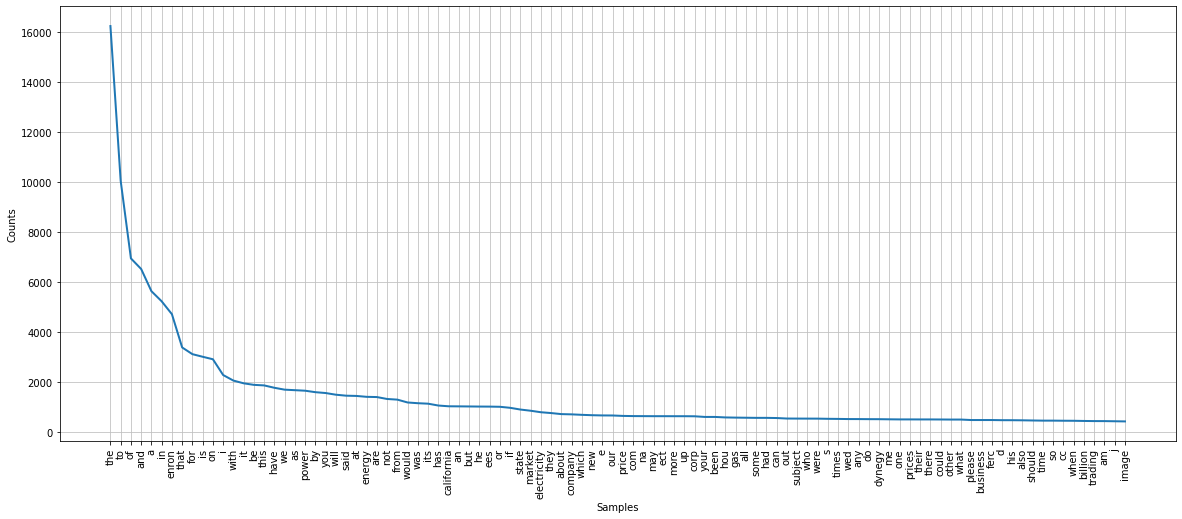

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))

fdist.plot(100,cumulative=False)
plt.show()

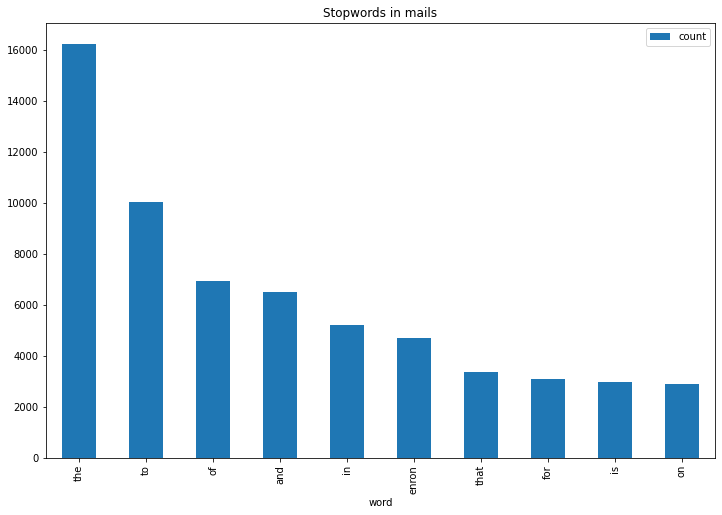

In [ ]:
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Stopwords in mails')


In [ ]:
# all the stop words we have 
stop = stopwords.words('english')


In [ ]:
text_df['text'] = text_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
text_df

,email,text
0,174299,let know
1,173170,fly dc biloxi
2,174119,message cut conclusion continue need address k...
3,175498,
4,125766,todays news weekend following order year later...
...,...,...
1697,234796,
1698,175279,forward whomever see fit looks like opportunit...
1699,139494,agree morris
1700,176682,looks good nice work lets get vance meyer pm s...


In [ ]:
def text_normalization(text):
    text=str(text).lower() # text to lower case
    spl_char_text=re.sub(r'[^ a-z]','',text) # removing special characters
    tokens=nltk.word_tokenize(spl_char_text) # word tokenizing
    lema=wordnet.WordNetLemmatizer() # intializing lemmatization
    tags_list=pos_tag(tokens,tagset=None) # parts of speech
    lema_words=[]   # empty list 
    for token,pos_token in tags_list:
        if pos_token.startswith('V'):  # Verb
            pos_val='v'
        elif pos_token.startswith('J'): # Adjective
            pos_val='a'
        elif pos_token.startswith('R'): # Adverb
            pos_val='r'
        else:
            pos_val='n' # Noun
        lema_token=lema.lemmatize(token,pos_val) # performing lemmatization
        lema_words.append(lema_token) # appending the lemmatized token into a list
    
    return " ".join(lema_words) # returns the lemmatized tokens as a sentence 

In [ ]:
pip install wordnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wordnet: filename=wordnet-0.0.1b2-py3-none-any.whl size=10521 sha256=9331ec134beb31557643829af4bf35546a0eafe133526d0efbcb1f3a74e38814
  Stored in directory: /root/.cache/pip/wheels/8c/6d/01/fbf1762cd6428569ea48474660f9cfe029307cd6c0f2abcdec
Successfully built wordnet


In [ ]:
from nltk.stem import wordnet
from nltk import pos_tag

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
text_df['text']=text_df['text'].apply(text_normalization) # applying the fuction to the dataset to get clean text
text_df

,email,text
0,174299,let know
1,173170,fly dc biloxi
2,174119,message cut conclusion continue need address k...
3,175498,
4,125766,today news weekend follow order year later ene...
...,...,...
1697,234796,
1698,175279,forward whomever see fit look like opportunity...
1699,139494,agree morris
1700,176682,looks good nice work let get vance meyer pm st...


In [ ]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X1 = cv.fit_transform(text_df['text'])
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df1 = pd.DataFrame(words_freq)
wf_df1.columns = ['word', 'count']

tt30=wf_df1.head(30)

In [ ]:
tt30

,word,count
0,renewables,6932
1,applicant,6508
2,maggies,5216
3,gannett,4701
4,iceman,3102
5,ministerial,2998
6,residen,2898
7,mission,1936
8,boil,1874
9,ken,1757


In [ ]:
tt30.word.values

array(['renewables', 'applicant', 'maggies', 'gannett', 'iceman',
       'ministerial', 'residen', 'mission', 'boil', 'ken', 'awash',
       'slowly', 'choose', 'utilites', 'bandwidth', 'funders', 'attract',
       'inadvertantly', 'redev', 'mix', 'kdscommunications',
       'circumspect', 'apparentl', 'chicken', 'khakis', 'fletcher',
       'reults', 'logistical', 'pear', 'forecast'], dtype=object)

In [ ]:
top10_words=["renewables","applicant","maggies","gannett","iceman","ministerial","residen","mission","boil","ken","awash",'repa', 'application', 'mahan', 'garage', 'ici', 'mirant','resolution', 'misty', 'bold', 'kern', 'awenner', 'smell','chorus', 'uttered', 'bangalore', 'fundraiser', 'attraction','inasmuch', 'reduces', 'mm', 'keeler', 'cisco', 'apparentl','child', 'kilometre', 'flexible', 'revenue', 'lon', 'peful','foreign',"enron","please","thank","ect","corp","hou"]

In [ ]:
text_df['text'] = text_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (top10_words)]))
text_df

,email,text
0,174299,let know
1,173170,fly dc biloxi
2,174119,message cut conclusion continue need address k...
3,175498,
4,125766,today news weekend follow order year later ene...
...,...,...
1697,234796,
1698,175279,forward whomever see fit look like opportunity...
1699,139494,agree morris
1700,176682,looks good nice work let get vance meyer pm st...


In [ ]:
text_df[(text_df['text'] == '')]


,email,text
3,175498,
5,201615,
15,175842,
16,233309,
25,54616,
...,...,...
1688,54659,
1692,116119,
1694,54543,
1696,122030,


In [ ]:
text_df_removeable=text_df[(text_df['text'].str.split().str.len() < 4)]
text_df_removeable

,email,text
0,174299,let know
1,173170,fly dc biloxi
3,175498,
5,201615,
8,173163,ross malme anthony
...,...,...
1692,116119,
1694,54543,
1696,122030,
1697,234796,


In [ ]:
text_df['text']=text_df['text'].str.strip()

In [ ]:
text_df.isnull().sum()

email    0
text     0
dtype: int64

In [ ]:
text_df = text_df.dropna()

In [ ]:
text_df

,email,text
0,174299,let know
1,173170,fly dc biloxi
2,174119,message cut conclusion continue need address k...
3,175498,
4,125766,today news weekend follow order year later ene...
...,...,...
1697,234796,
1698,175279,forward whomever see fit look like opportunity...
1699,139494,agree morris
1700,176682,looks good nice work let get vance meyer pm st...


In [ ]:
text_df[(text_df['text'].str.split().str.len() == 0)]

,email,text
3,175498,
5,201615,
15,175842,
16,233309,
25,54616,
...,...,...
1688,54659,
1692,116119,
1694,54543,
1696,122030,


In [ ]:
cond = text_df['email'].isin(text_df_removeable['email'])
text_df.drop(text_df[cond].index, inplace = True)

In [ ]:
text_df

,email,text
2,174119,message cut conclusion continue need address k...
4,125766,today news weekend follow order year later ene...
6,52167,vince ive hearing rumor decide endorse nodal p...
7,221197,jim able provide dan meeting would appreciate ...
9,150202,stan understand completely best achieve desire...
...,...,...
1693,139738,something u talk next staff meeting three proj...
1695,115323,preempt jeff dasovich ees pm mary hain joe har...
1698,175279,forward whomever see fit look like opportunity...
1700,176682,looks good nice work let get vance meyer pm st...


In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

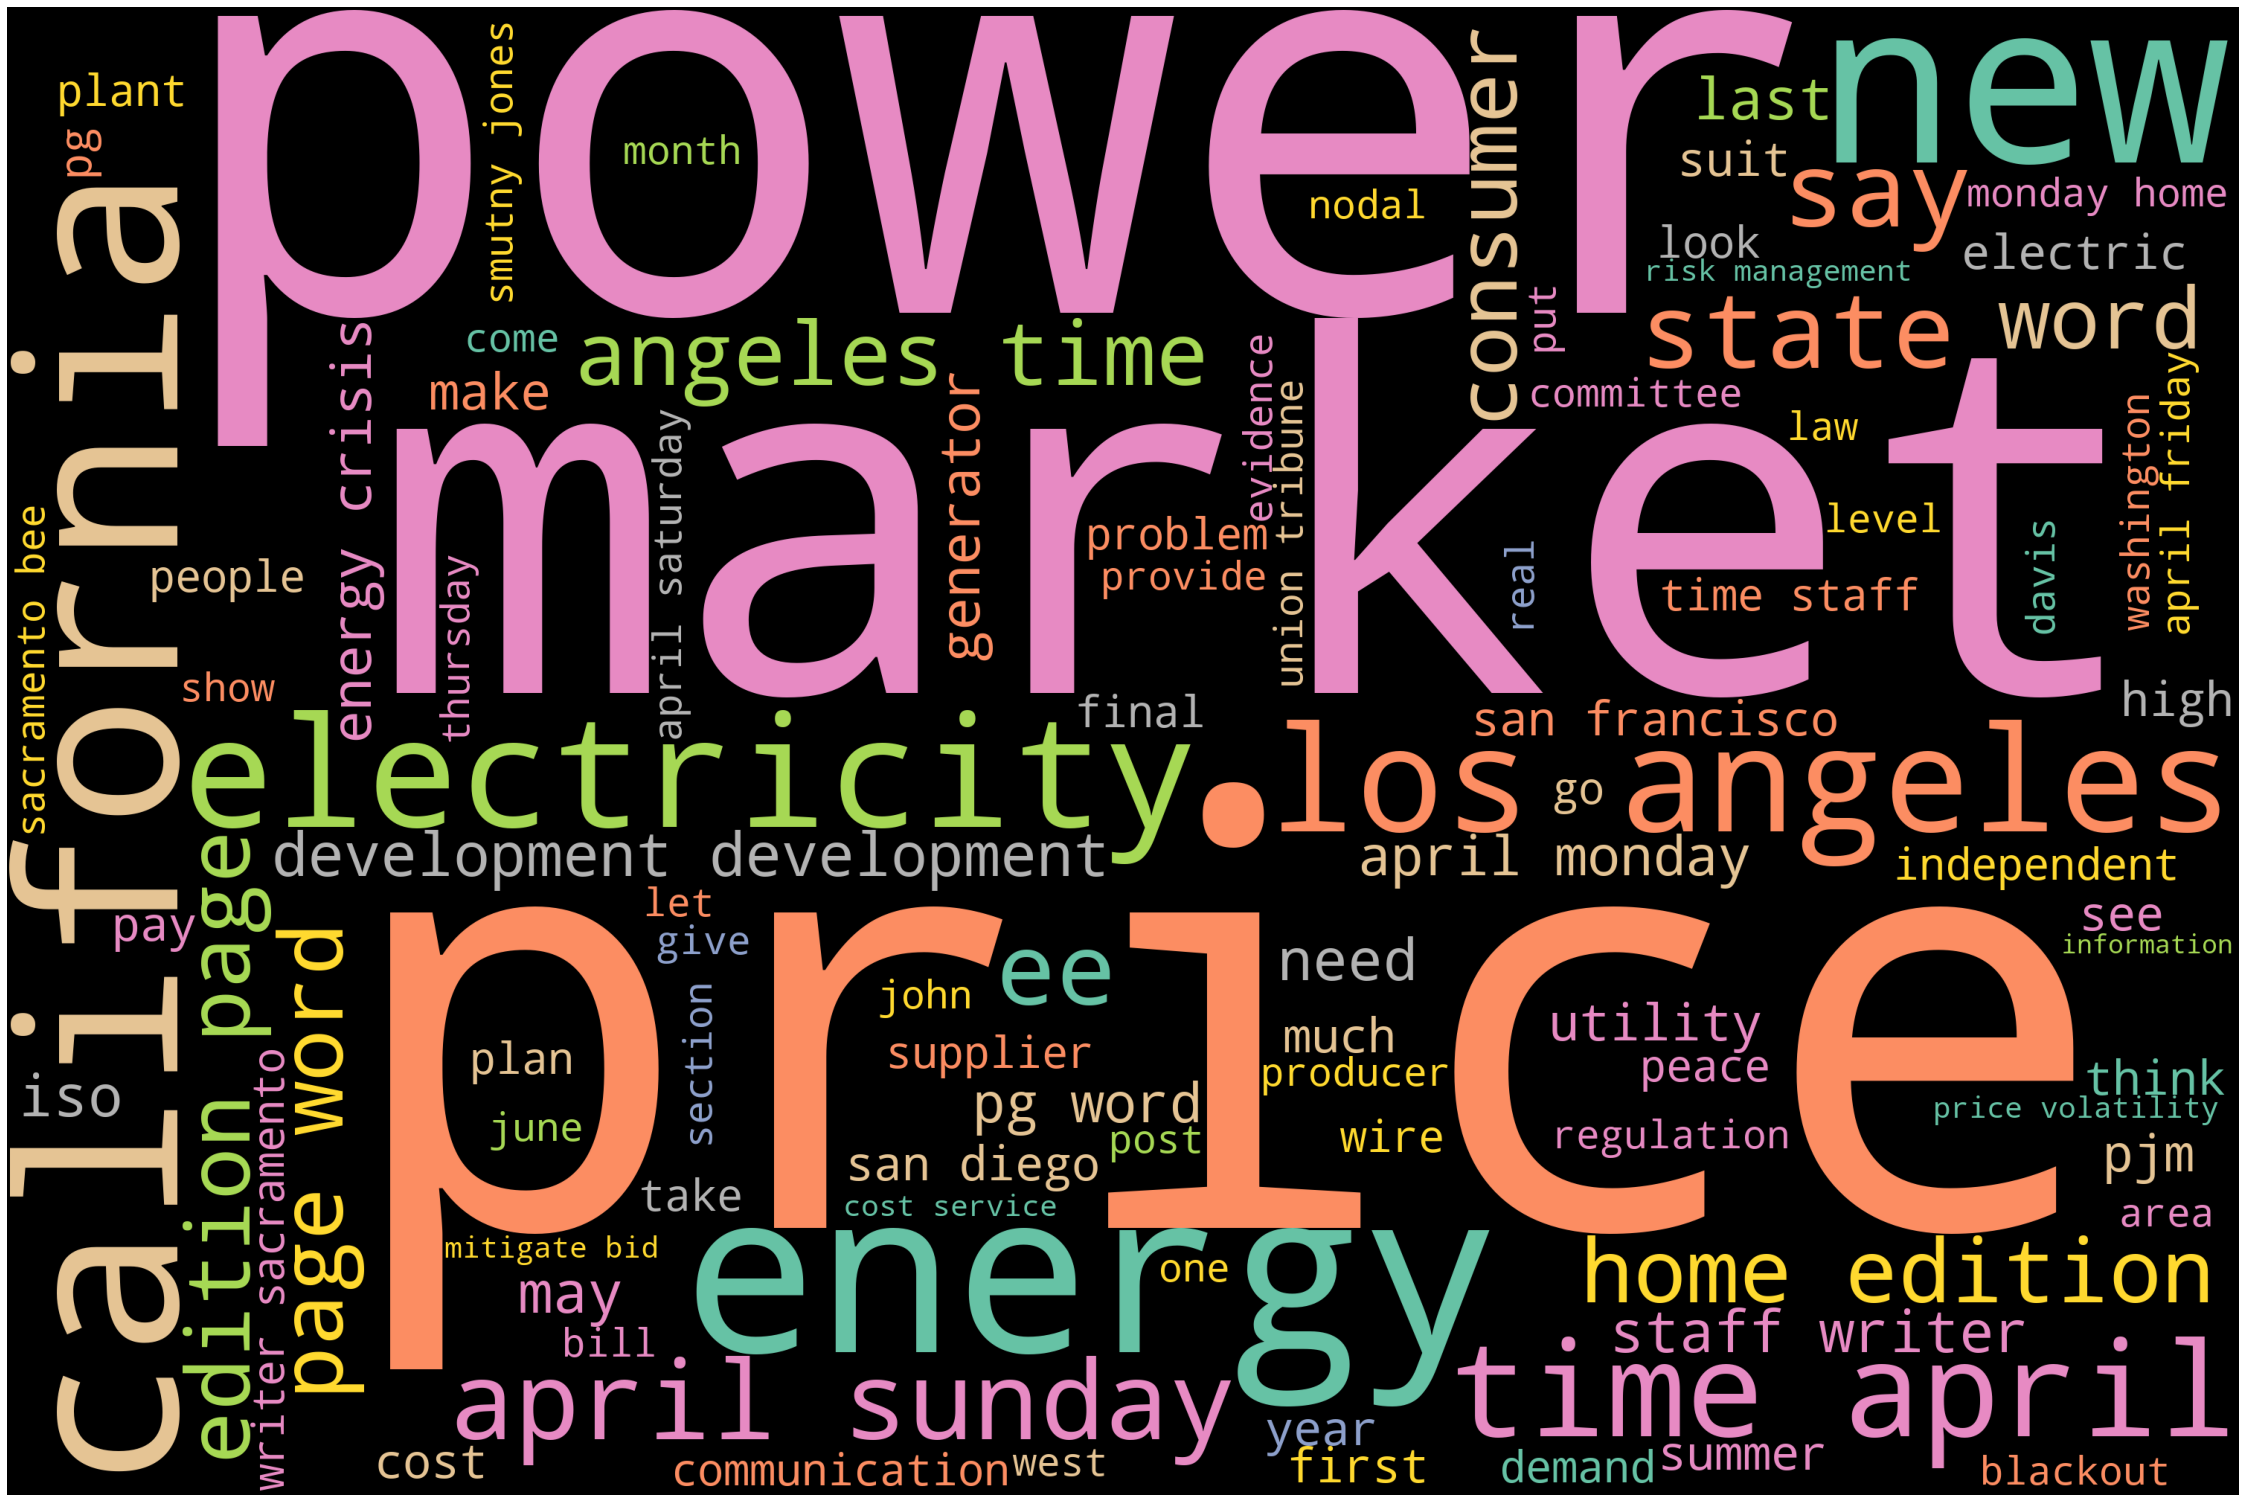

In [ ]:
text = text_df['text'].values 

wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2').generate(str(text))
plot_cloud(wordcloud)

In [ ]:
df=pd.merge(text_df, label_df, on='email', how='outer')
df

,email,text,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,...,3.4,3.5,3.6,3.7,3.8,3.9,3.10,3.11,3.12,3.13
0,174119,message cut conclusion continue need address k...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,125766,today news weekend follow order year later ene...,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,52167,vince ive hearing rumor decide endorse nodal p...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,221197,jim able provide dan meeting would appreciate ...,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,150202,stan understand completely best achieve desire...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,137905,NaN,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1698,173257,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1699,122493,NaN,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1700,175494,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df=df.dropna()

In [ ]:
df

,email,text,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,...,3.4,3.5,3.6,3.7,3.8,3.9,3.10,3.11,3.12,3.13
0,174119,message cut conclusion continue need address k...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,125766,today news weekend follow order year later ene...,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,52167,vince ive hearing rumor decide endorse nodal p...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,221197,jim able provide dan meeting would appreciate ...,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,150202,stan understand completely best achieve desire...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,139738,something u talk next staff meeting three proj...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1238,115323,preempt jeff dasovich ees pm mary hain joe har...,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1239,175279,forward whomever see fit look like opportunity...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1240,176682,looks good nice work let get vance meyer pm st...,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
label_df.columns

Index(['4.1', '4.2', '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '4.10',
       '4.11', '4.12', '4.13', '4.14', '4.15', '4.16', '4.17', '4.18', '4.19',
       '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '2.10', '2.11', '2.12',
       '2.13', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9',
       '3.10', '3.11', '3.12', '3.13'],
      dtype='object')

In [ ]:
### Split Dataset into Train and Text
from sklearn.model_selection import train_test_split
# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
tfidf

TfidfVectorizer()

In [ ]:
corpus=df["text"]

In [ ]:
Xfeatures = tfidf.fit_transform(corpus).toarray()

In [ ]:
ylabels = df[['4.1', '4.2', '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '4.10',
       '4.11', '4.12', '4.13', '4.14', '4.15', '4.16', '4.17', '4.18', '4.19',
       '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '2.10', '2.11', '2.12',
       '2.13', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9',
       '3.10', '3.11', '3.12', '3.13']]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.05,random_state=7)

In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1179, 13153) (1179, 53)
(63, 13153) (63, 53)


# MODEL BUILDING

In [ ]:
!pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 89 kB 6.6 MB/s 


In [ ]:
# ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss,classification_report

In [ ]:
# Multi Label Pkgs
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

In [ ]:
binary_rel_clf = BinaryRelevance(MultinomialNB())

In [ ]:
binary_rel_clf.fit(x_train,y_train)

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [ ]:
br_prediction = binary_rel_clf.predict(x_test)

In [ ]:
br_prediction

<63x53 sparse matrix of type '<class 'numpy.int64'>'
	with 122 stored elements in Compressed Sparse Column format>

In [ ]:
br_prediction.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
accuracy_score(y_test,br_prediction)

0.1111111111111111

In [ ]:
hamming_loss(y_test,br_prediction)

0.055106319257262656

In [ ]:
def build_model(model,mlb_estimator,xtrain,ytrain,xtest,ytest):
    # Create an Instance
    clf = mlb_estimator(model)
    clf.fit(xtrain,ytrain)
    # Predict
    clf_predictions = clf.predict(xtest)
    # Check For Accuracy
    acc = accuracy_score(ytest,clf_predictions)
    ham = hamming_loss(ytest,clf_predictions)
    result = {"accuracy:":acc,"hamming_score":ham}
    return result

In [ ]:
clf_chain_model = build_model(MultinomialNB(),ClassifierChain,x_train,y_train,x_test,y_test)


In [ ]:
clf_chain_model

{'accuracy:': 0.07936507936507936, 'hamming_score': 0.05630428271937706}

In [ ]:
clf_labelP_model = build_model(MultinomialNB(),LabelPowerset,x_train,y_train,x_test,y_test)


In [ ]:
clf_labelP_model

{'accuracy:': 0.20634920634920634, 'hamming_score': 0.05480682839173405}

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
categories=['4.1', '4.2', '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '4.10',
       '4.11', '4.12', '4.13', '4.14', '4.15', '4.16', '4.17', '4.18', '4.19',
       '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '2.10', '2.11', '2.12',
       '2.13', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9',
       '3.10', '3.11', '3.12', '3.13']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(corpus,ylabels,test_size=0.05,random_state=42)

In [ ]:
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(x_train, y_train)
    # compute the testing accuracy
    prediction = NB_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test, prediction)))

... Processing 4.1
Test accuracy is 0.14285714285714285
... Processing 4.2
Test accuracy is 0.14285714285714285
... Processing 4.3
Test accuracy is 0.14285714285714285
... Processing 4.4
Test accuracy is 0.14285714285714285
... Processing 4.5
Test accuracy is 0.14285714285714285
... Processing 4.6
Test accuracy is 0.14285714285714285
... Processing 4.7
Test accuracy is 0.14285714285714285
... Processing 4.8
Test accuracy is 0.14285714285714285
... Processing 4.9
Test accuracy is 0.14285714285714285
... Processing 4.10
Test accuracy is 0.14285714285714285
... Processing 4.11
Test accuracy is 0.14285714285714285
... Processing 4.12
Test accuracy is 0.14285714285714285
... Processing 4.13
Test accuracy is 0.14285714285714285
... Processing 4.14
Test accuracy is 0.14285714285714285
... Processing 4.15
Test accuracy is 0.14285714285714285
... Processing 4.16
Test accuracy is 0.14285714285714285
... Processing 4.17
Test accuracy is 0.14285714285714285
... Processing 4.18
Test accuracy is 0.1

In [ ]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(x_train, y_train)
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test, prediction)))

... Processing 4.1
Test accuracy is 0.2222222222222222
... Processing 4.2
Test accuracy is 0.2222222222222222
... Processing 4.3
Test accuracy is 0.2222222222222222
... Processing 4.4
Test accuracy is 0.2222222222222222
... Processing 4.5
Test accuracy is 0.2222222222222222
... Processing 4.6
Test accuracy is 0.2222222222222222
... Processing 4.7
Test accuracy is 0.2222222222222222
... Processing 4.8
Test accuracy is 0.2222222222222222
... Processing 4.9
Test accuracy is 0.2222222222222222
... Processing 4.10
Test accuracy is 0.2222222222222222
... Processing 4.11
Test accuracy is 0.2222222222222222
... Processing 4.12
Test accuracy is 0.2222222222222222
... Processing 4.13
Test accuracy is 0.2222222222222222
... Processing 4.14
Test accuracy is 0.2222222222222222
... Processing 4.15
Test accuracy is 0.2222222222222222
... Processing 4.16
Test accuracy is 0.2222222222222222
... Processing 4.17
Test accuracy is 0.2222222222222222
... Processing 4.18
Test accuracy is 0.2222222222222222
.

In [ ]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(x_train, y_train)
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test, prediction)))

... Processing 4.1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 4.2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 4.3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 4.4


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 4.5


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 4.6


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 4.7


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 4.8


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 4.9


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 4.10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 4.11


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 4.12


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 4.13


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 4.14


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 4.15


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 4.16


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 4.17


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 4.18


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 4.19


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 1.1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 1.2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 1.3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 1.4


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 1.5


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 1.6


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 1.7


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 1.8


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 2.1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 2.2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 2.3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 2.4


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 2.5


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 2.6


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 2.7


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 2.8


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 2.9


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 2.10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 2.11


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 2.12


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 2.13


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 3.1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 3.2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 3.3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 3.4


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 3.5


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 3.6


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 3.7


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 3.8


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 3.9


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 3.10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 3.11


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 3.12


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808
... Processing 3.13


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Test accuracy is 0.23809523809523808


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
